<a href="https://colab.research.google.com/github/chonyeagoro/Machine_Learning_Project_4_Final/blob/main/Apple_vs_Tesla_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import tensorflow as tf

In [52]:
import os
# Find the latest version of spark 3.x  from https://downloads.apache.org/spark/ and enter as the spark version
# For example:
# spark_version = 'spark-3.5.1'
spark_version = 'spark-3.5.1'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop3.tgz
!tar xf $SPARK_VERSION-bin-hadoop3.tgz
!pip install -q findspark

# Set Environment Variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop3"

# Start a SparkSession
import findspark
findspark.init()

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,377 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,129 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 3,762 kB in 1s (2,517 kB/s)
Reading package lists... Done


In [53]:
df = pd.read_csv('/content/Stock_Market_Dataset.csv')
df

,Unnamed: 0,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,0,2/2/2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,1,1/2/2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2,2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,1238,8/2/2019,2.583,147880.0,52.72,621000.0,2.8140,270.0,"3,661.70",699230.0,...,"3,00,771",240.0,347.57,7560000.0,79.41,113150000.0,167.33,12560000.0,"1,318.50",150610.0
1239,1239,7/2/2019,2.551,211790.0,52.64,749010.0,2.8320,320.0,"3,397.70",471360.0,...,"3,02,813",240.0,344.71,7860000.0,80.72,92530000.0,166.38,17520000.0,"1,314.20",166760.0
1240,1240,6/2/2019,2.662,98330.0,54.01,606720.0,2.8400,100.0,"3,404.30",514210.0,...,"3,08,810",120.0,352.19,6720000.0,82.01,78800000.0,170.49,13280000.0,"1,314.40",137250.0
1241,1241,5/2/2019,2.662,82250.0,53.66,609760.0,2.8205,90.0,"3,468.40",460950.0,...,"3,10,700",360.0,355.81,9050000.0,82.94,89060000.0,171.16,22560000.0,"1,319.20",129010.0


In [54]:
df.rename(columns={'Unnamed: 0': 'Index'}, inplace = True)
df

,Index,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,0,2/2/2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,1,1/2/2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2,2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,1238,8/2/2019,2.583,147880.0,52.72,621000.0,2.8140,270.0,"3,661.70",699230.0,...,"3,00,771",240.0,347.57,7560000.0,79.41,113150000.0,167.33,12560000.0,"1,318.50",150610.0
1239,1239,7/2/2019,2.551,211790.0,52.64,749010.0,2.8320,320.0,"3,397.70",471360.0,...,"3,02,813",240.0,344.71,7860000.0,80.72,92530000.0,166.38,17520000.0,"1,314.20",166760.0
1240,1240,6/2/2019,2.662,98330.0,54.01,606720.0,2.8400,100.0,"3,404.30",514210.0,...,"3,08,810",120.0,352.19,6720000.0,82.01,78800000.0,170.49,13280000.0,"1,314.40",137250.0
1241,1241,5/2/2019,2.662,82250.0,53.66,609760.0,2.8205,90.0,"3,468.40",460950.0,...,"3,10,700",360.0,355.81,9050000.0,82.94,89060000.0,171.16,22560000.0,"1,319.20",129010.0


In [55]:
df.columns

Index(['Index', 'Date', 'Natural_Gas_Price', 'Natural_Gas_Vol.',
       'Crude_oil_Price', 'Crude_oil_Vol.', 'Copper_Price', 'Copper_Vol.',
       'Bitcoin_Price', 'Bitcoin_Vol.', 'Platinum_Price', 'Platinum_Vol.',
       'Ethereum_Price', 'Ethereum_Vol.', 'S&P_500_Price', 'Nasdaq_100_Price',
       'Nasdaq_100_Vol.', 'Apple_Price', 'Apple_Vol.', 'Tesla_Price',
       'Tesla_Vol.', 'Microsoft_Price', 'Microsoft_Vol.', 'Silver_Price',
       'Silver_Vol.', 'Google_Price', 'Google_Vol.', 'Nvidia_Price',
       'Nvidia_Vol.', 'Berkshire_Price', 'Berkshire_Vol.', 'Netflix_Price',
       'Netflix_Vol.', 'Amazon_Price', 'Amazon_Vol.', 'Meta_Price',
       'Meta_Vol.', 'Gold_Price', 'Gold_Vol.'],
      dtype='object')

In [56]:
df.drop(['Natural_Gas_Price', 'Natural_Gas_Vol.',
       'Crude_oil_Price', 'Crude_oil_Vol.', 'Copper_Price', 'Copper_Vol.',
       'Bitcoin_Price', 'Bitcoin_Vol.', 'Platinum_Price', 'Platinum_Vol.',
       'Ethereum_Price', 'Ethereum_Vol.', 'S&P_500_Price', 'Nasdaq_100_Price',
       'Nasdaq_100_Vol.','Microsoft_Price', 'Microsoft_Vol.', 'Silver_Price',
       'Silver_Vol.', 'Google_Price', 'Google_Vol.', 'Nvidia_Price',
       'Nvidia_Vol.', 'Berkshire_Price', 'Berkshire_Vol.', 'Netflix_Price',
       'Netflix_Vol.', 'Amazon_Price', 'Amazon_Vol.', 'Meta_Price',
       'Meta_Vol.', 'Gold_Price', 'Gold_Vol.'], axis=1, inplace=True)
df

,Index,Date,Apple_Price,Apple_Vol.,Tesla_Price,Tesla_Vol.
0,0,2/2/2024,185.85,102550000.0,187.91,110610000.0
1,1,1/2/2024,186.86,53490000.0,188.86,90680000.0
2,2,31-01-2024,184.40,54830000.0,187.29,102270000.0
3,3,30-01-2024,188.04,55270000.0,191.59,105540000.0
4,4,29-01-2024,191.73,46890000.0,190.93,123600000.0
...,...,...,...,...,...,...
1238,1238,8/2/2019,42.60,95280000.0,20.39,87660000.0
1239,1239,7/2/2019,42.73,126970000.0,20.50,97810000.0
1240,1240,6/2/2019,43.56,112960000.0,21.15,75580000.0
1241,1241,5/2/2019,43.55,144410000.0,21.42,101140000.0


In [57]:
df['Date'] = df['Date'].str.replace('/', '-')
df

,Index,Date,Apple_Price,Apple_Vol.,Tesla_Price,Tesla_Vol.
0,0,2-2-2024,185.85,102550000.0,187.91,110610000.0
1,1,1-2-2024,186.86,53490000.0,188.86,90680000.0
2,2,31-01-2024,184.40,54830000.0,187.29,102270000.0
3,3,30-01-2024,188.04,55270000.0,191.59,105540000.0
4,4,29-01-2024,191.73,46890000.0,190.93,123600000.0
...,...,...,...,...,...,...
1238,1238,8-2-2019,42.60,95280000.0,20.39,87660000.0
1239,1239,7-2-2019,42.73,126970000.0,20.50,97810000.0
1240,1240,6-2-2019,43.56,112960000.0,21.15,75580000.0
1241,1241,5-2-2019,43.55,144410000.0,21.42,101140000.0


In [58]:
# Check Data to make sure that the data set does not have any Null values
null_values = df.isnull().sum()
# Print the Values
print("Null values count for each column:")
print(null_values)

Null values count for each column:
Index          0
Date           0
Apple_Price    0
Apple_Vol.     0
Tesla_Price    0
Tesla_Vol.     0
dtype: int64


In [59]:
df.dropna(inplace=True)
null_values = df.isnull().sum()
print("Number of null values: ")
print(null_values)

Number of null values: 
Index          0
Date           0
Apple_Price    0
Apple_Vol.     0
Tesla_Price    0
Tesla_Vol.     0
dtype: int64


In [60]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Apple_Price'], label='Apple Price', color='blue')
plt.plot(df['Year'], df['Tesla_Price'], label='Tesla Price', color='orange')
plt.title('Apple and Tesla Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend(title='Price Type')
plt.tight_layout()
plt.show()

ValueError: time data "31-01-2024" doesn't match format "%m-%d-%Y", at position 2. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [65]:
apple_price = avg_apple_scatter["Apple_Price"]
apple_volume = avg_apple_scatter["Apple_Volume"]

NameError: name 'avg_apple_scatter' is not defined

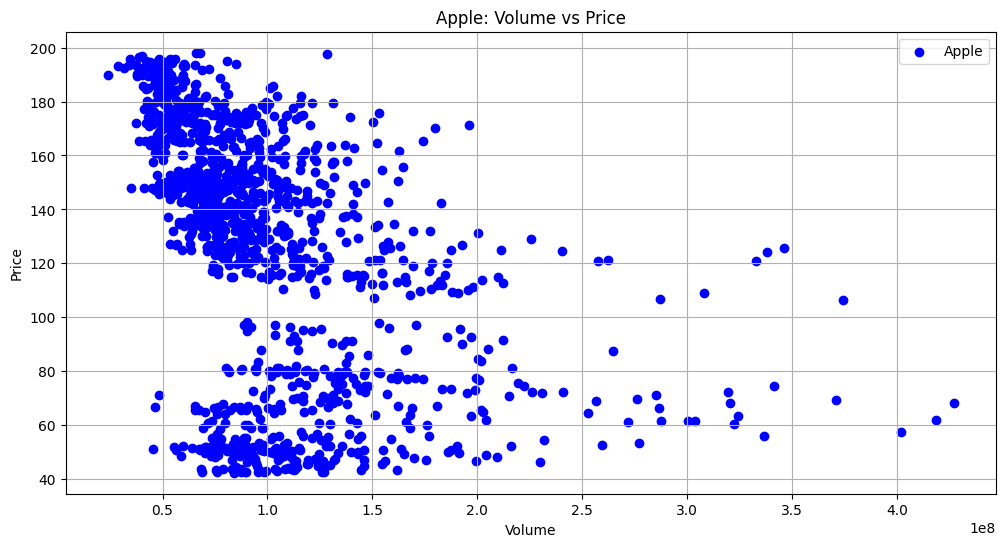

In [64]:

apple_data = df[['Date', 'Apple_Price', 'Apple_Vol.']
# Plot scatter plots for Apple
plt.figure(figsize=(12, 6))
plt.scatter(apple_data['Apple_Vol.'], apple_data['Apple_Price'], color='blue', label='Apple')
plt.title('Apple: Volume vs Price')
plt.xlabel('Volume')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()